In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

In [17]:
def seed(s=1337):
    torch.manual_seed(s)
    np.random.seed(s)

In [3]:
def make_grid():
    grid_in = torch.zeros(1, 3, 7)
    grid_out = torch.zeros(1, 3, 7)
    potential = torch.rand(1).item()
#     potential = 1
    grid_in[0, 1, 1] = potential
    grid_out[0, 1, 5] = potential
    
    return grid_in, grid_out

seed()
make_grid()

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0783, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]]]),
 tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0783, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]]]))

In [4]:
class Automata(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 10, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(10, 10, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(10, 1, kernel_size=1, stride=1, padding=0),
            nn.Tanh(),
        )

    def forward(self, grid, steps):
        sequence = [grid]
        for i in range(steps):
            grid = grid + self.net(grid)
            sequence.append(grid)
        return sequence

In [5]:
seed()
grid_in, grid_out = make_grid()
ca = Automata()
out = ca.forward(grid_in, 1)
out[-1][0]

tensor([[-0.1262, -0.1096, -0.1106, -0.1089, -0.1077, -0.1077, -0.0887],
        [-0.1375, -0.0882, -0.1681, -0.1694, -0.1657, -0.1657, -0.1257],
        [-0.1109, -0.1498, -0.1513, -0.1517, -0.1504, -0.1504, -0.1312]],
       grad_fn=<SelectBackward0>)

  0%|          | 0/5000 [00:00<?, ?it/s]

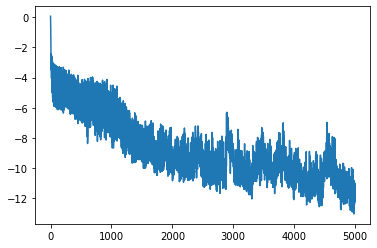

In [6]:
iters = 5000
steps = 10
losses = []

seed()
ca = Automata()
optim = torch.optim.Adam(ca.parameters(), lr=0.002)

for i in tqdm(range(iters)):
    grid_in, grid_out = make_grid()
    seq = ca.forward(grid_in, steps)
    grid_pred = seq[-1]
    loss = F.mse_loss(grid_pred, grid_out)

    optim.zero_grad()
    loss.backward()
    optim.step()

    losses.append(loss.item())
    
plt.plot(np.log(losses))

In [7]:
grid_in

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.7109, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]]])

In [22]:
seed(1)
grid_in, grid_out = make_grid()
seq = ca.forward(grid_in, steps)

In [24]:
grid_out

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7576, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]]])

In [25]:
seq[-1][0, 1, 5].detach().numpy()

array(0.7562136, dtype=float32)

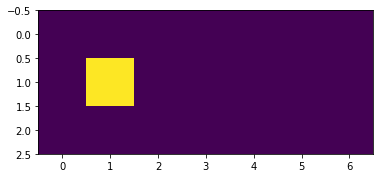

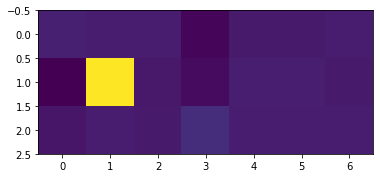

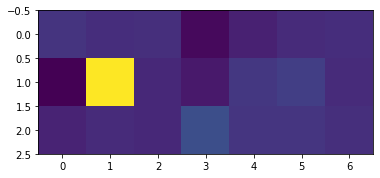

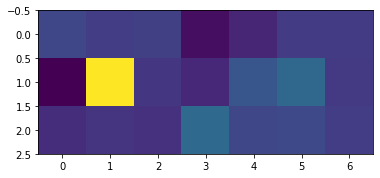

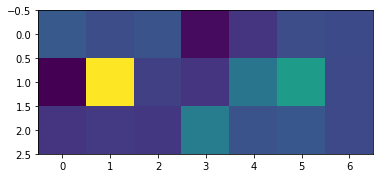

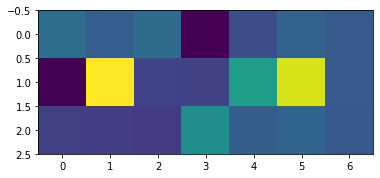

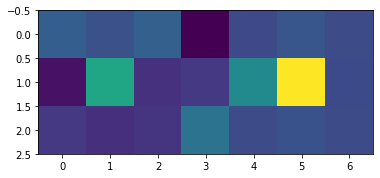

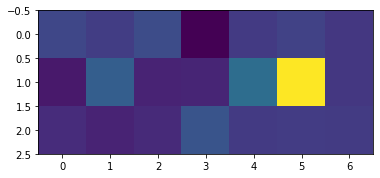

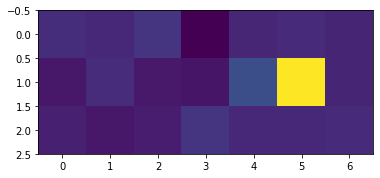

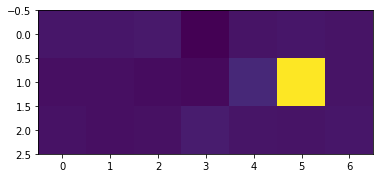

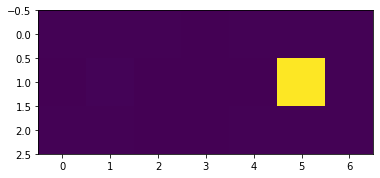

In [26]:
for el in seq:
    plt.imshow(el[0].detach())
    plt.show()